# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [2]:
import pandas as pd

## imports for Python, Pandas

In [3]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [5]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [6]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [7]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## 1. Find the 10 countries with most projects

In [9]:
# load as Pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [10]:
json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [11]:
json_df.iloc[0,:]

_id                                      {'$oid': '52b213b38594d8a2be17c780'}
approvalfy                                                               1999
board_approval_month                                                 November
boardapprovaldate                                        2013-11-12T00:00:00Z
borrower                              FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA
closingdate                                              2018-07-07T00:00:00Z
country_namecode                 Federal Democratic Republic of Ethiopia!$!ET
countrycode                                                                ET
countryname                           Federal Democratic Republic of Ethiopia
countryshortname                                                     Ethiopia
docty                       Project Information Document,Indigenous People...
envassesmentcategorycode                                                    C
grantamt                                                        

In [12]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [13]:
import matplotlib.pyplot as plt

In [14]:
json_df_countries = json_df.groupby('countryname')['countrycode'].count().sort_values(ascending=False)

In [15]:
most_countries = json_df_countries.iloc[0:10]

In [16]:
print(most_countries)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countrycode, dtype: int64


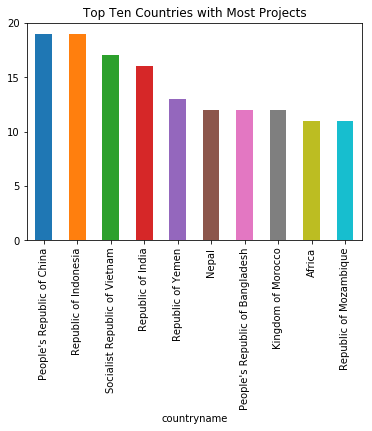

In [62]:
most_countries.plot(kind='bar', yticks = (0,5,10,15,20), title='Top Ten Countries with Most Projects')

plt.show()

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [39]:
j = json.load(open('data/world_bank_projects.json'))

theme = json_normalize(j, 'mjtheme_namecode')

theme1 = theme.groupby(['code', 'name']).size().sort_values(ascending=False).head(10)
theme1

code  name                                        
11    Environment and natural resources management    223
10    Rural development                               202
8     Human development                               197
2     Public sector governance                        184
6     Social protection and risk management           158
4     Financial and private sector development        130
7     Social dev/gender/inclusion                     119
5     Trade and integration                            72
9     Urban development                                47
1     Economic management                              33
dtype: int64

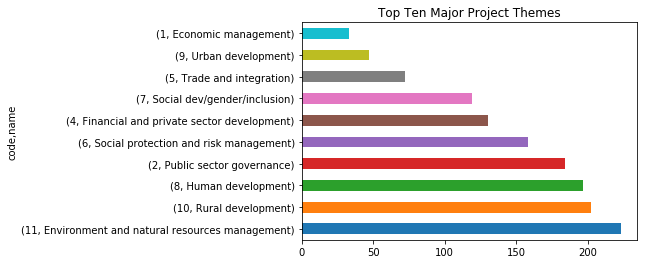

In [66]:
theme1.plot(kind='barh', yticks=( 0,50,100,150,200,250,300), title='Top Ten Major Project Themes')
plt.show()

## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [69]:
theme

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [77]:
theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [81]:
import numpy as np

In [119]:
theme['name'].replace('', np.nan, inplace=True)

In [161]:
theme.head()

,code,name
code,,
8,8,Human development
11,11,NaN
1,1,Economic management
6,6,Social protection and risk management
5,5,Trade and integration


In [162]:
theme.reset_index(drop=True)
theme

,code,name
code,,
8,8,Human development
11,11,NaN
1,1,Economic management
6,6,Social protection and risk management
5,5,Trade and integration
2,2,Public sector governance
11,11,Environment and natural resources management
6,6,Social protection and risk management
7,7,Social dev/gender/inclusion


In [166]:
theme2 = theme.sort_values('code')
theme2['name'] = theme2.name.replace(np.nan, method='pad')
theme2 = theme2.groupby('name', as_index = False)['name'].agg({'total_number': np.size})
theme2 = theme2.rename(columns={'name':'project_theme'})
theme2_df = theme2.sort_values(by='total_number', ascending=False)
theme2_df.head(10)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,project_theme,total_number
1,Environment and natural resources management,250
6,Rural development,216
3,Human development,210
4,Public sector governance,199
8,Social protection and risk management,168
2,Financial and private sector development,146
7,Social dev/gender/inclusion,130
9,Trade and integration,77
10,Urban development,50
0,Economic management,38


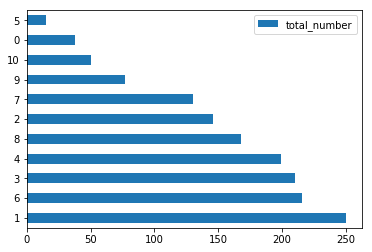

In [175]:
theme2_df.plot(kind='barh')
plt.show()